Paper Link: https://arxiv.org/abs/1409.1556

In [3]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['VGG_architecture.png']))

Saving VGG_architecture.png to VGG_architecture.png


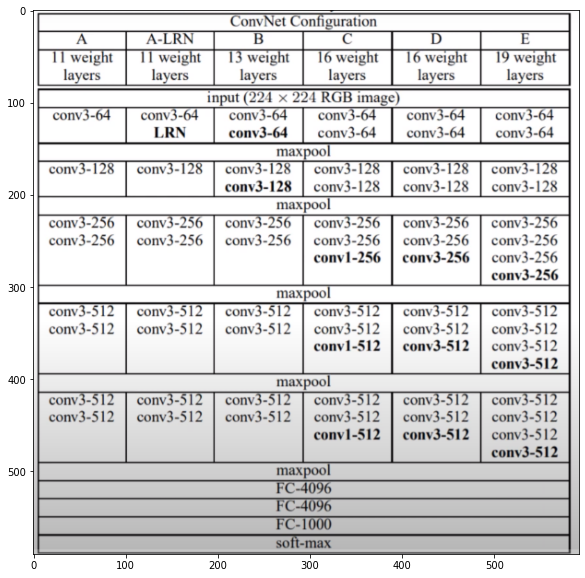

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

In [6]:
import torch
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # Adam, SGD
import torch.nn.functional as F # All functions that don't have parameters
from torch.utils.data import DataLoader # Gives easier dataset management and creates mini batches
import torchvision.datasets as datasets # Has standard datasets 
import torchvision.transforms as transforms  # perfomr transformation on the datasets

In [25]:
VGG_types = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}
#Then Flatten and 4096x4096x1000 Linear layers

In [26]:
class VGG_net(nn.Module):
  def __init__(self, in_channels=3, num_classes=1000):
    super(VGG_net, self).__init__()
    self.in_channels = in_channels
    self.conv_layers = self.create_conv_layers(VGG_types['VGG16'])

    self.fcs = nn.Sequential(
        nn.Linear(512*7*7, 4096),  # 224/(2**5) = 7
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, 4096),  
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, num_classes)
    )

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fcs(x)
    return x

  def create_conv_layers(self,architecture):
    layers = []
    in_channels = self.in_channels

    for x in architecture:
      if type(x) == int:
        out_channels = x

        layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels, 
                             kernel_size=(3,3), stride=(1,1), padding=(1,1)),
                   nn.BatchNorm2d(x),
                   nn.ReLU(x)
                   ]

        in_channels = x

      elif x == 'M':
        layers += [nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))]

    return nn.Sequential(*layers)

In [27]:
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  model = VGG_net(in_channels=3, num_classes=1000).to(device)
  x = torch.randn(1, 3, 224, 224).to(device)
  print(model(x).shape)

torch.Size([1, 1000])
